In [1]:
import numpy as np            # for mathematical computations
import nltk                   # for downloading the Reuters corpus
from datetime import datetime # for tracking training time
import sys                    # to exit in case of non-terminating errors
import pickle                 # to store word embeddings to an external file

In [2]:
nltk.download('reuters')
from nltk.corpus import reuters

"""
for preprocessing the text
"""
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

print(stopwords.words('english'))

"""
for plotting the visualizations
"""
import matplotlib.pyplot as plt

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'a

In [3]:
reuters.categories(['training/9865', 'training/9880'])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [4]:
len(reuters.words()), len(reuters.categories()), len(reuters.fileids())

(1720901, 90, 10788)

In [5]:
# populating arrays with the list of all categories and their respective file counts
categories = []
file_count = []

# calculating the number of documents in each category
for i in reuters.categories():
  # print("$ There are {} documents included in topic \"{}\"".format(len(reuters.fileids(i)), i))
  file_count.append(len(reuters.fileids(i)))
  categories.append(i)

counts=list(zip(file_count,categories))
counts.sort(reverse=True)

for i in range (15):
  print(counts[i])

(3964, 'earn')
(2369, 'acq')
(717, 'money-fx')
(582, 'grain')
(578, 'crude')
(485, 'trade')
(478, 'interest')
(286, 'ship')
(283, 'wheat')
(237, 'corn')
(175, 'dlr')
(174, 'money-supply')
(171, 'oilseed')
(162, 'sugar')
(139, 'coffee')


In [6]:
len(reuters.words(reuters.fileids(['coffee'])))

36710

In [7]:
top_cat = []
top_cat.append(counts[14])
top_cat = [v for _,v in top_cat]

In [8]:
# select fileid with the category filter
doc_list = np.array(reuters.fileids(top_cat))
# doc_list = doc_list[doc_list != 'training/3267']

test_doc = doc_list[['test' in x for x in doc_list]]
print(">>> test_doc is created with following document names: {} ...".format(test_doc[0:5]))
train_doc = doc_list[['training' in x for x in doc_list]]
print(">>> train_doc is created with following document names: {} ...".format(train_doc[0:5]))

test_corpus = [" ".join([t for t in reuters.words(test_doc[t])])
               for t in range(len(test_doc))]
print(">>> test_corpus is created, the first line is: {} ...".format(test_corpus[0][:100]))
train_corpus = [" ".join([t for t in reuters.words(train_doc[t])])
                for t in range(len(train_doc))]
print(">>> train_corpus is created, the first line is: {} ...".format(train_corpus[0][:100]))

>>> test_doc is created with following document names: ['test/14840' 'test/15198' 'test/15329' 'test/15357' 'test/15540'] ...
>>> train_doc is created with following document names: ['training/10014' 'training/10100' 'training/1026' 'training/10268'
 'training/1030'] ...
>>> test_corpus is created, the first line is: INDONESIAN COMMODITY EXCHANGE MAY EXPAND The Indonesian Commodity Exchange is likely to start tradin ...
>>> train_corpus is created, the first line is: COFFEE , SUGAR AND COCOA EXCHANGE NAMES CHAIRMAN The New York Coffee , Sugar and Cocoa Exchange ( CS ...


In [9]:
def preprocess(corpus):
  # cleans the text corpus by removing stopwords, converting all sentences to lowercase, removing all non-english characters and lemmatization
  Stopwords = set(stopwords.words("english"))
  clean_corpus = []
  data = {}
  vocab = {}
  vocab_inverse = {}

  for doc in corpus:
    doc = re.sub("[^A-Za-z]+", " ", doc)
    doc = word_tokenize(doc)
    doc = [d.lower() for d in doc]
    doc = [d for d in doc if d not in Stopwords]
    lemmatizer = WordNetLemmatizer()
    doc = [lemmatizer.lemmatize(d) for d in doc]
    for d in doc:
      if d not in data:
        data[d]=1
      else:
        data[d]+=1
        #word_mapping[d]=i
        #index_mapping[i]=d
    clean_corpus.append(doc)
  V=len(data)
  data_unique = sorted(list(data.keys()))
  for i in range(len(data_unique)):
    vocab[data_unique[i]] = i
    vocab_inverse[i] = data_unique[i]
  
  clean_corpus = [" ".join(d) for d in clean_corpus]
  return clean_corpus, vocab, vocab_inverse, data, data_unique, V


In [10]:
clean_train_corpus, train_vocab, train_vocab_inverse, train_data, train_data_unique, train_vocab_size = preprocess(train_corpus)
clean_test_corpus, test_vocab, test_vocab_inverse, test_data, test_data_unique, test_vocab_size = preprocess(test_corpus)

test_corpus[:5], clean_test_corpus[:5]

(['INDONESIAN COMMODITY EXCHANGE MAY EXPAND The Indonesian Commodity Exchange is likely to start trading in at least one new commodity , and possibly two , during calendar 1987 , exchange chairman Paian Nainggolan said . He told Reuters in a telephone interview that trading in palm oil , sawn timber , pepper or tobacco was being considered . Trading in either crude palm oil ( CPO ) or refined palm oil may also be introduced . But he said the question was still being considered by Trade Minister Rachmat Saleh and no decision on when to go ahead had been made . The fledgling exchange currently trades coffee and rubber physicals on an open outcry system four days a week . " Several factors make us move cautiously ," Nainggolan said . " We want to move slowly and safely so that we do not make a mistake and undermine confidence in the exchange ." Physical rubber trading was launched in 1985 , with coffee added in January 1986 . Rubber contracts are traded FOB , up to five months forward . R

In [11]:
test_vocab_size, train_vocab_size

(1094, 2812)

In [12]:
def generate_target_context_word_pairs(corpus, window_size):
    context_words = []
    target_word   = []
    for doc in corpus:
      words = doc.split()
      for index, word in enumerate(words):
        doc_length = len(words)
        # for index, word in enumerate(words):
        start = index - window_size
        end = index + window_size + 1
          
        context_words.append([words[i] for i in range(start, end) if 0 <= i < doc_length and i != index])
        target_word.append(word)
          
    return context_words, target_word

In [13]:
test_context, test_word = generate_target_context_word_pairs(clean_test_corpus, 2)
train_context, train_word = generate_target_context_word_pairs(clean_train_corpus, 2)
len(test_context), len(train_context), test_context[:10], test_word[:10]

(3032,
 16098,
 [['commodity', 'exchange'],
  ['indonesian', 'exchange', 'may'],
  ['indonesian', 'commodity', 'may', 'expand'],
  ['commodity', 'exchange', 'expand', 'indonesian'],
  ['exchange', 'may', 'indonesian', 'commodity'],
  ['may', 'expand', 'commodity', 'exchange'],
  ['expand', 'indonesian', 'exchange', 'likely'],
  ['indonesian', 'commodity', 'likely', 'start'],
  ['commodity', 'exchange', 'start', 'trading'],
  ['exchange', 'likely', 'trading', 'least']],
 ['indonesian',
  'commodity',
  'exchange',
  'may',
  'expand',
  'indonesian',
  'commodity',
  'exchange',
  'likely',
  'start'])

In [26]:
vocabulary = test_vocab           # vocabulary of training corpus
vocab_size = test_vocab_size      # size of vocabulary
embedding_size = 10               # required dimension of each word vector
window_size = 2                   # window size for context words around target word
learning_rate = 0.0005            # learning rate for training
words = test_data_unique
word_index = {}                   # index mapping each word to a number
for i in range(len(words)):
  word_index[words[i]]=i
W_hidden = np.random.uniform(-0.01, 0.01, (vocab_size, embedding_size)) # weight matrix for input layer ( n X |V| )
W_output = np.random.uniform(-0.01, 0.01, (embedding_size, vocab_size)) # weight matrix for hidden layer ( |V| X n )

final_vectors = {}
minval = 0.00001

print("Word vector size = %s"%embedding_size)
print("Vocabulary size = %s"%vocab_size)
print("Word Index dictionary = %s"%word_index)
print("hidden parameter matrix = %s"%W_hidden)
print("output parameter matrix = %s"%W_output)

Word vector size = 10
Vocabulary size = 1094
Word Index dictionary = {'aa': 0, 'ab': 1, 'abandoned': 2, 'abide': 3, 'abroad': 4, 'accept': 5, 'acceptance': 6, 'accepted': 7, 'accord': 8, 'according': 9, 'account': 10, 'act': 11, 'activity': 12, 'actual': 13, 'adamant': 14, 'add': 15, 'added': 16, 'adding': 17, 'addition': 18, 'additional': 19, 'adequate': 20, 'adopted': 21, 'advantage': 22, 'affected': 23, 'afrique': 24, 'aggravate': 25, 'aggressively': 26, 'agree': 27, 'agreed': 28, 'agreement': 29, 'agriculture': 30, 'ahead': 31, 'aid': 32, 'alberto': 33, 'allocated': 34, 'allocating': 35, 'allocation': 36, 'allow': 37, 'allowed': 38, 'almost': 39, 'already': 40, 'also': 41, 'although': 42, 'american': 43, 'among': 44, 'amount': 45, 'amounted': 46, 'amsterdam': 47, 'analyst': 48, 'announced': 49, 'announcement': 50, 'annual': 51, 'another': 52, 'anything': 53, 'apparently': 54, 'apply': 55, 'approves': 56, 'april': 57, 'arango': 58, 'area': 59, 'argue': 60, 'around': 61, 'arrangement

In [15]:
def normalize_rows(matrix):
  # Normalization function to normalize rows of a matrix
    return matrix/np.linalg.norm(matrix, ord=2, axis=1, keepdims=True)

In [16]:
def one_hot(n):
  v = np.zeros((test_vocab_size))
  v[n]=1
  return v

In [18]:
def generate_normalized_noise_dist(test_data):
  unigram_prob = {key: val/sum(test_data.values()) for key, val in test_data.items()}
  alpha = 3/4
  
  noise_dist = {key: val ** alpha for key, val in unigram_prob.items()}
  Z = sum(noise_dist.values())
  noise_dist_normalized_keys = [key for key, val in noise_dist.items()]
  noise_dist_normalized_values = [val / Z for key, val in noise_dist.items()]

  return noise_dist_normalized_keys, noise_dist_normalized_values

In [19]:
def sigmoid(x):
    # applies sigmoid to a vector
    vector = 1/(1+np.exp(-x))
    return vector

In [20]:
def cross_entropy(y_hat, y):
  # computes cross entropy error given the prediction and true label
  
  loss = -y*np.log(y_hat + minval)
  return loss

In [22]:
def SGD_optimizer(num_epochs, W_hidden, W_output, test_data, K=10):
  # using SGD to fit the matrices V and U
  costs = []
  begin_time = datetime.now()

  # generate noise distribution
  P1, P2 =generate_normalized_noise_dist(test_data)

  for k in range(1, num_epochs + 1):
    epoch_cost = 0

    if k%50==0 :
      print("Epoch #%d"%k)

    for j in range(len(test_context)):

      for context in test_context[j]:
        cost=0.0

        # draw K negative samples from P1, P2
        W_neg = np.random.choice(P1, size=K, p=P2)

        # calculating hidden layer matrix 'h'=np.dot(W_hidden.T, one_hot(test_word[j]))
        h = W_hidden[word_index[test_word[j]], :]

        c_pos=W_output[:, word_index[context]]
        # calculate gradients for parameters of both layers
        grad_V_output_pos = (sigmoid(c_pos * h) - 1) * h
        grad_V_input = (sigmoid(c_pos * h) - 1) * c_pos
        cost += -np.log(sigmoid(c_pos * h))

        grad_V_output_neg_list = []
        for w in W_neg:
          c_neg=W_output[:, word_index[w]]
          grad_V_output_neg_list.append(sigmoid(c_neg * h) * h)
          grad_V_input += sigmoid(c_neg * h) * c_neg
          cost += -np.log(sigmoid(-c_neg * h))
          
        # update outer layer and hidden layer parameters
        W_output[:, word_index[context]] = W_output[:, word_index[context]] - learning_rate * grad_V_output_pos
        W_hidden = W_hidden-learning_rate*grad_V_input
        for q in range(K):
          W_output[:, word_index[W_neg[q]]] = W_output[:, word_index[W_neg[q]]] - learning_rate * grad_V_output_neg_list[q]  

        epoch_cost += np.sum(cost) 
    costs.append(epoch_cost)
    # storing final vectors and epoch_cost to a file
    if k%100 == 0:
      with open('/content/drive/My Drive/Colab Notebooks/negatuve/lr=0.0005/wh_epoch_'+str(k), 'wb') as handle1:
        pickle.dump(W_hidden, handle1, protocol=pickle.HIGHEST_PROTOCOL) 
      with open('/content/drive/My Drive/Colab Notebooks/negatuve/lr=0.0005/wo_epoch_'+str(k), 'wb') as handle2:
        pickle.dump(W_output, handle2, protocol=pickle.HIGHEST_PROTOCOL)

    if k%50==0 :
      print('Epoch cost : %d'%epoch_cost)
      with open('/content/drive/My Drive/Colab Notebooks/negatuve/lr=0.0005/error', 'wb') as handle2:
        pickle.dump(costs, handle2, protocol=pickle.HIGHEST_PROTOCOL)
    
  end_time = datetime.now()
  print('Total training time: {}'.format(end_time - begin_time))

  # Plotting each epoch's cost
  plt.plot(np.arange(num_epochs), costs)
  plt.xlabel('# of epochs')
  plt.ylabel('cost')
  plt.savefig('/content/drive/My Drive/Colab Notebooks/negatuve/lr=0.0005/epochs.png', bbox_inches='tight')


Epoch #50
Epoch cost : 395040
Epoch #100
Epoch cost : 394959
Epoch #150
Epoch cost : 394873
Epoch #200
Epoch cost : 395022
Epoch #250
Epoch cost : 395126
Total training time: 0:24:33.993288


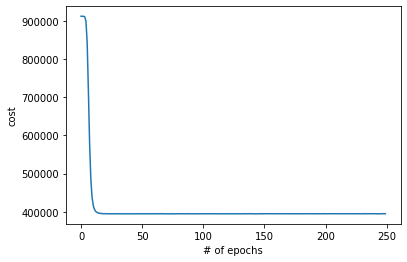

In [27]:
SGD_optimizer(250, W_hidden, W_output, test_data, 10)

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
0
0
0
0
0
0

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/negatuve/lr=0.0001/error', 'rb') as handle3:
  costs = pickle.load(handle3)
len(costs)

1000

In [ ]:
W_hidden.shape

(1094, 50)

In [ ]:
def find_top_n_similar(word, n=5):
    arr  = {}
    vec_word = copy_final_vectors[word]
    norm_vec_word = np.linalg.norm(vec_word)
    for j,v in word_index.items():
        cos_sim = np.dot(copy_final_vectors[j], vec_word.T) / (np.linalg.norm(copy_final_vectors[j], axis=0) * norm_vec_word)
        arr[cos_sim] = j
    for i in sorted(arr, key=arr.get, reverse=True):
        if n <= 0:
            break
        print(arr[i], end =" , ")
        n  = n-1

In [ ]:
import sklearn
hv = sklearn.metrics.pairwise.cosine_similarity(W_hidden)
#av = sklearn.metrics.pairwise.cosine_similarity(W)
hv

array([[ 1.        ,  0.00648377,  0.68184478, ...,  0.16659161,
        -0.43095321,  0.11816728],
       [ 0.00648377,  1.        , -0.02415703, ..., -0.08375536,
         0.51175143, -0.33043325],
       [ 0.68184478, -0.02415703,  1.        , ..., -0.09706497,
        -0.28582754,  0.08952261],
       ...,
       [ 0.16659161, -0.08375536, -0.09706497, ...,  1.        ,
        -0.23943807,  0.26873191],
       [-0.43095321,  0.51175143, -0.28582754, ..., -0.23943807,
         1.        , -0.72119037],
       [ 0.11816728, -0.33043325,  0.08952261, ...,  0.26873191,
        -0.72119037,  1.        ]])

In [ ]:
def obtain_similar_words(word, n):
  y=np.argsort(np.argsort(hv))
  #z=np.argsort(np.argsort(av))
  yrr=[]
  #zrr=[]
  for i in range(1093, 1093-n, -1):
    r1=np.where(y[test_vocab[word]]==i)
    #r2=np.where(z[word_index[word]]==i)
    yrr.append(r1[0][0])
    #zrr.append(r2[0][0])
  print('The',n,'most similar words to',word,'are :-')
  for k in yrr:
    print(test_vocab_inverse[k], end=" , ")


In [ ]:
obtain_similar_words('coffee', 10)

The 10 most similar words to coffee are :-
coffee , request , member , nicaragua , certification , responsible , july , value , slowly , currency , 

In [ ]:
obtain_similar_words('production', 10)

The 10 most similar words to production are :-
production , sao , potential , newspaper , nainggolan , coupled , difficult , teeth , adding , reporting , 

In [ ]:
obtain_similar_words('indonesian', 10)

The 10 most similar words to indonesian are :-
indonesian , exporter , obtain , map , imported , future , fund , rupiah , part , government , 

In [ ]:
obtain_similar_words('tea', 10)

The 10 most similar words to tea are :-
tea , remainder , brasil , participate , reflect , billion , discrepancy , order , tomorrow , november , 

In [ ]:
obtain_similar_words('expand', 10)

The 10 most similar words to expand are :-
expand , starting , made , instant , held , solution , bernie , necessary , delivered , allocation , 

In [ ]:
obtain_similar_words('brazil', 10)

The 10 most similar words to brazil are :-
brazil , infant , bra , europe , finance , talk , council , predict , prompt , voluntarily , 

In [ ]:
obtain_similar_words('increase', 10)
obtain_similar_words('money', 10)
obtain_similar_words('minister', 10)

The 10 most similar words to increase are :-
increase , side , construction , conducted , r , patchy , new , leather , suffered , longer , The 10 most similar words to money are :-
money , historic , lower , cpo , order , find , calculating , stance , revealed , r , The 10 most similar words to minister are :-
minister , object , outdated , grind , tonne , strategy , chance , initial , accepted , kenyan , 

In [ ]:
word_index


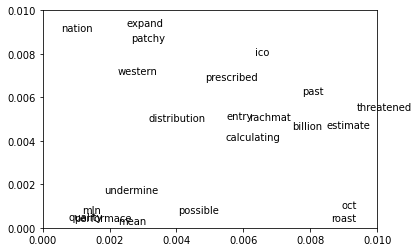

In [ ]:
#u, s, vh = np.linalg.svd(W_hidden)
arr = [word_index['trade'],word_index['money'],word_index['private'],word_index['export'],word_index['price'],word_index['production'],word_index['lowest']
       ,word_index['quota'],word_index['september'],word_index['situation'],word_index['spending'],word_index['market'],word_index['monitor']]
for i in range(test_vocab_size):
  if 0.00<=u[i,2]<=0.01 and 0.00<=u[i,3]<=0.01:
    plt.text(u[i,2], u[i,3], test_vocab_inverse[i])
    plt.axis([0.00, 0.01, 0.00, 0.01])
  #plt.savefig('/content/drive/My Drive/Colab Notebooks/sg/lr=0.0005 n=10/sim2.png', bbox_inches='tight')

In [ ]:
def predict(word,number_of_predictions):
  if word in words:
    index = word_index[word]
    X = [0 for i in range(test_vocab_size)]
    X[index] = 1
    h = np.dot(W_hidden.T, X)
    u = np.dot(W_output.T, h)
    prediction = softmax(u)
    output = {}
    for i in range(test_vocab_size):
      output[prediction[i]] = i
      
    top_context_words = [] 
    for k in sorted(output,reverse=True):
      top_context_words.append(words[output[k]])
      if(len(top_context_words)>=number_of_predictions):
        break
    return top_context_words
  else:
    print("Word not found in dicitonary")

In [ ]:
predict("coffee", 10)

['withdrawing',
 'pact',
 'status',
 'unhappy',
 'whole',
 'change',
 'amount',
 'marketing',
 'formula',
 'job']

In [ ]:
predict("brazil", 10)

['growing',
 'slowly',
 'attain',
 'nicaragua',
 'newspaper',
 'merchandise',
 'company',
 'rica',
 'creditor',
 'mark']

In [ ]:
predict("increase", 10)

['sport',
 'letter',
 'seek',
 'january',
 'bidder',
 'establish',
 'solution',
 'hoped',
 'would',
 'negative']